In [2]:
import numpy as np
import pandas as pd
import torch.nn as nn
import matplotlib.pyplot as mlt
import torch

In [13]:
cal = pd.read_csv('Data/caltech.csv')
jpl = pd.read_csv('Data/jpl.csv')
palo_alto = pd.read_csv('Data/palo_alto.csv')

In [310]:
cal.describe()

,Day of week,Energy,stations,Week Day,Year,Month,Day of month,hour,peak_level
count,11664.000000,11664.000000,11664.000000,11664.000000,11664.000000,11664.000000,11664.000000,11664.000000,11664.000000
mean,4.006173,8.003936,3.943587,0.713992,2018.997942,6.528807,15.699588,11.500000,0.875000
std,1.996472,12.534464,5.807885,0.451913,0.498987,3.904659,8.784498,6.922483,0.832327
min,1.000000,0.000000,0.000000,0.000000,2018.000000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,2019.000000,3.000000,8.000000,5.750000,0.000000
50%,4.000000,2.497391,1.000000,1.000000,2019.000000,7.000000,16.000000,11.500000,1.000000
75%,6.000000,10.467221,5.000000,1.000000,2019.000000,11.000000,23.000000,17.250000,2.000000
max,7.000000,96.633452,35.000000,1.000000,2020.000000,12.000000,31.000000,23.000000,2.000000


In [311]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11664 entries, 0 to 11663
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Start         11664 non-null  object 
 1   Day of week   11664 non-null  int64  
 2   Energy        11664 non-null  float64
 3   stations      11664 non-null  float64
 4   Week Day      11664 non-null  int64  
 5   Year          11664 non-null  int64  
 6   Month         11664 non-null  int64  
 7   Day of month  11664 non-null  int64  
 8   hour          11664 non-null  int64  
 9   peak_level    11664 non-null  float64
dtypes: float64(3), int64(6), object(1)
memory usage: 911.4+ KB


In [297]:
cal.drop(['Start'], inplace=True, axis=1)

In [293]:
test = torch.tensor(cal.values[:, 1:], dtype=torch.float32)

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.

In [17]:
cal = cal[cal['Start'] >= '2018-11-01 00:00:00'].reset_index(drop=True)
jpl = jpl[jpl['Start'] >= '2018-11-01 00:00:00'].reset_index(drop=True)
palo_alto = palo_alto[palo_alto['Start'] >= '2018-11-01 00:00:00'].reset_index(drop=True)

In [315]:
cal

,Start,Day of week,Energy,stations,Week Day,Year,Month,Day of month,Hour
0,2018-11-01 00:00:00,4,1.233417,3.0,1,2018,11,1,0
1,2018-11-01 01:00:00,4,0.921776,2.0,1,2018,11,1,1
2,2018-11-01 02:00:00,4,0.921776,2.0,1,2018,11,1,2
3,2018-11-01 03:00:00,4,0.921776,2.0,1,2018,11,1,3
4,2018-11-01 04:00:00,4,0.921776,2.0,1,2018,11,1,4
...,...,...,...,...,...,...,...,...,...
21443,2021-04-12 11:00:00,1,1.876034,1.0,1,2021,4,12,11
21444,2021-04-12 12:00:00,1,6.247034,2.0,1,2021,4,12,12
21445,2021-04-12 13:00:00,1,4.389953,2.0,1,2021,4,12,13
21446,2021-04-12 14:00:00,1,4.325494,2.0,1,2021,4,12,14


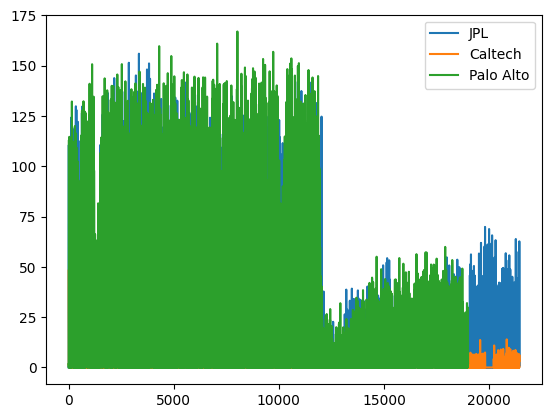

In [19]:
mlt.plot(jpl['Energy'], label='JPL')
mlt.plot(cal['Energy'], label='Caltech')
mlt.plot(palo_alto['Energy'], label='Palo Alto')
mlt.legend()
mlt.show()

In [25]:
palo_alto_processed = pd.read_csv('Data/caltech_processed.csv')

In [29]:
# correlation matrix
correlation_matrix = palo_alto_processed[palo_alto_processed.columns[1:]].corr()
correlation_matrix

,Day of week,Energy,stations,Week Day,Year,Month,Day of month,hour,peak_level
Day of week,1.000000e+00,-0.214706,-0.241970,-7.894735e-01,-2.052859e-03,1.429023e-03,-4.939582e-03,7.802397e-18,-1.546702e-18
Energy,-2.147062e-01,1.000000,0.945409,2.560727e-01,-8.548003e-02,-5.088545e-03,-2.646090e-02,7.970677e-02,6.174366e-01
stations,-2.419696e-01,0.945409,1.000000,2.989675e-01,-8.909309e-02,-4.363263e-03,-2.973869e-02,7.702104e-02,6.462042e-01
Week Day,-7.894735e-01,0.256073,0.298968,1.000000e+00,6.515537e-03,-9.907680e-03,1.619495e-02,5.258081e-18,1.348897e-17
Year,-2.052859e-03,-0.085480,-0.089093,6.515537e-03,1.000000e+00,-6.405286e-01,-6.713409e-03,8.539911e-15,6.901451e-15
Month,1.429023e-03,-0.005089,-0.004363,-9.907680e-03,-6.405286e-01,1.000000e+00,1.177098e-02,6.285229e-16,-2.507011e-16
Day of month,-4.939582e-03,-0.026461,-0.029739,1.619495e-02,-6.713409e-03,1.177098e-02,1.000000e+00,8.411501e-17,-2.385144e-17
hour,7.802397e-18,0.079707,0.077021,5.258081e-18,8.539911e-15,6.285229e-16,8.411501e-17,1.000000e+00,3.073981e-01
peak_level,-1.546702e-18,0.617437,0.646204,1.348897e-17,6.901451e-15,-2.507011e-16,-2.385144e-17,3.073981e-01,1.000000e+00


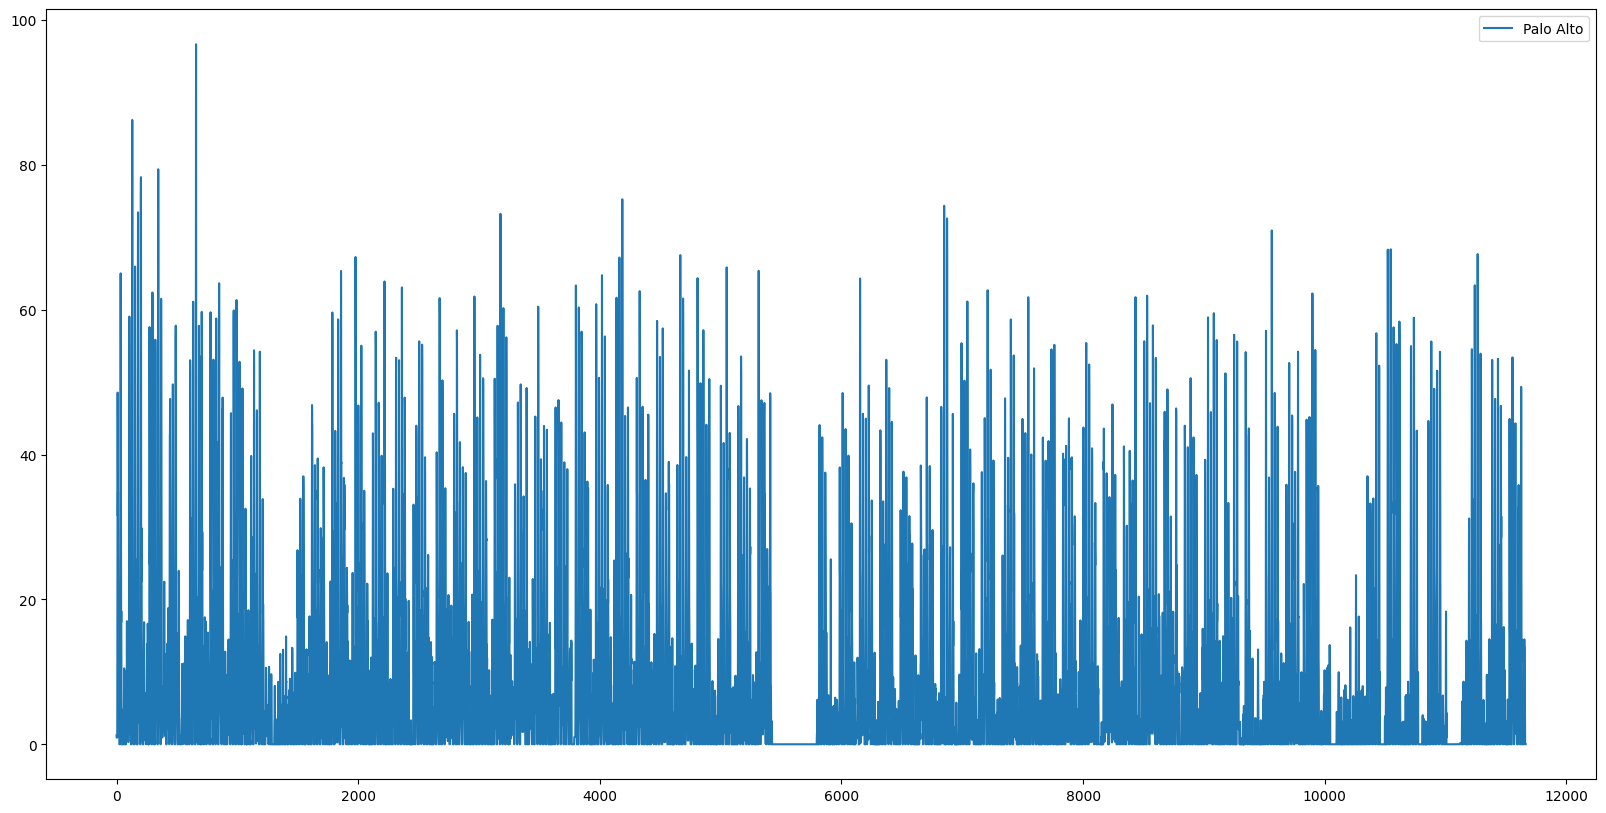

In [26]:
mlt.figure(figsize=(20, 10))
mlt.plot(palo_alto_processed['Energy'], label='Palo Alto')
mlt.legend()
mlt.show()

In [236]:
jpl['Start'] = pd.to_datetime(jpl['Start'])
jpl.set_index('Start', inplace=True)
monthly_total = jpl['Energy'].resample('M').sum()

days_per_month = jpl['Energy'].resample('M').count() / 24  # 24 hours per day

# Calculate the monthly average consumption
monthly_average = monthly_total / days_per_month

# Reset index to make it a DataFrame
monthly_average = monthly_average.reset_index()
monthly_average.columns = ['month', 'Energy']

In [14]:
def monthly_consumption(df):
    df['Hour'] = pd.to_datetime(df['Start']).dt.hour
    hourly_grouped = df.groupby([pd.to_datetime(df['Start']).dt.year, df['Month'], df['Day of month']])['Hour'].count().reset_index(name='Hour')
    day_grouped = hourly_grouped.groupby([hourly_grouped['Start'], hourly_grouped['Month']])['Day of month'].count().reset_index(name='Day of Month')
    average_values_weekdays = df.groupby([pd.to_datetime(df['Start']).dt.year, df['Month']])['Energy'].sum().reset_index(name='Energy')
    average_values_weekdays.loc[:,'Energy'] = average_values_weekdays['Energy'] // day_grouped['Day of Month']
    #average_values_weekdays = df.groupby([pd.to_datetime(df['Start']).dt.year, df['Month']])['Energy'].mean().reset_index(name='Energy')
    month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
    average_values_weekdays['Month_Name'] = average_values_weekdays['Month'].map(month_names)

    # Combine 'Month_Name' and 'Start' columns to create 'Month-Year' column
    average_values_weekdays['Month-Year'] = average_values_weekdays['Month_Name'] + '-' + average_values_weekdays['Start'].astype(str)
    return average_values_weekdays

In [15]:
def plot_monthly_consumption(df1, df2, df3):
    mlt.figure(figsize=(20, 6))
    mlt.suptitle('Average energy consumption per month')
    mlt.ylabel('Average Energy Consumption in Kwh')
    mlt.plot(df2['Month-Year'], df2['Energy'], label='JPL', marker='o')
    mlt.plot(df1['Month-Year'], df1['Energy'], label='Caltech', marker='*')
    mlt.plot(df3['Month-Year'], df3['Energy'], label='Palo Alto', marker='x')
    mlt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate x-axis labels for better visibility
    mlt.legend()
    mlt.show()

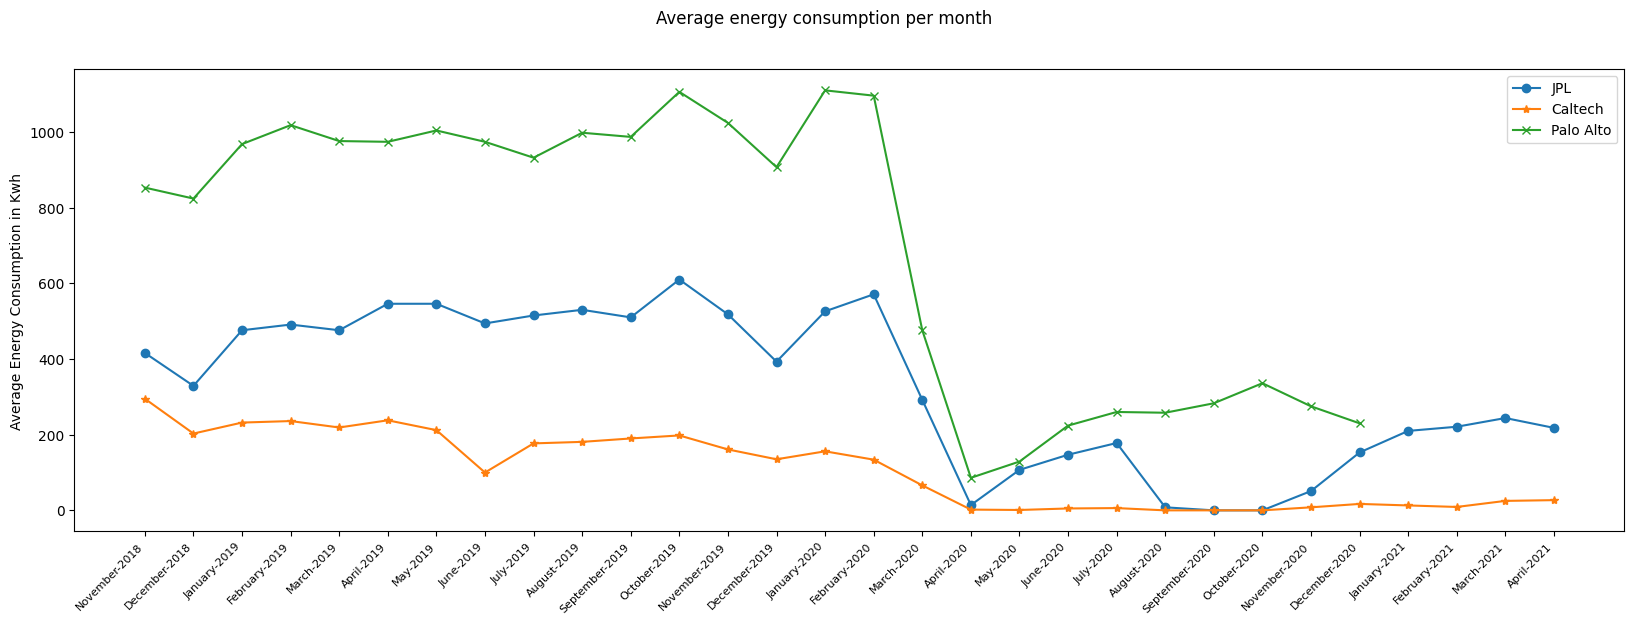

In [18]:
cal_monthly = monthly_consumption(cal)
jpl_monthly = monthly_consumption(jpl)
palo_alto_monthly = monthly_consumption(palo_alto)
plot_monthly_consumption(cal_monthly, jpl_monthly, palo_alto_monthly)

In [244]:
cal_avg = jpl.groupby([jpl['Week Day'], pd.to_datetime(jpl['Start']).dt.hour])['Energy'].mean().reset_index(name='Energy')

In [270]:
cal_avg_weekday = cal_avg[cal_avg['Week Day'] == 1].reset_index(drop=True)

In [273]:
cal_avd_weekend = cal_avg[cal_avg['Week Day'] == 0]

In [274]:
thresholds = np.quantile(cal_avd_weekend['Energy'], [0.40, 0.70])

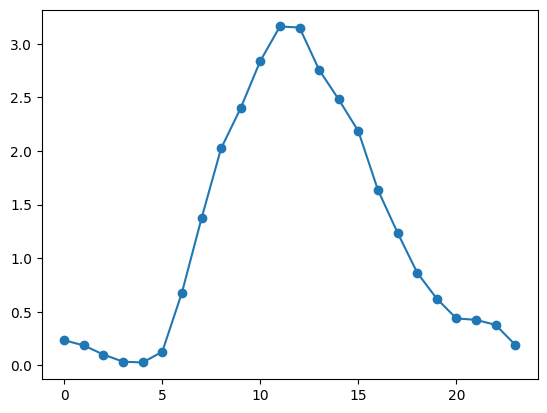

In [275]:
mlt.plot(cal_avd_weekend['Energy'], label='Average Energy Consumption', marker='o')

In [276]:
zero = cal_avd_weekend[cal_avd_weekend['Energy'] <= thresholds[0]]

In [277]:
one = cal_avd_weekend[(cal_avd_weekend['Energy'] > thresholds[0]) & (cal_avd_weekend['Energy'] <= thresholds[1])]

In [278]:
two = cal_avd_weekend[cal_avd_weekend['Energy'] > thresholds[1]]

In [279]:
zero

,Week Day,Start,Energy
0,0,0,0.235289
1,0,1,0.186537
2,0,2,0.101529
3,0,3,0.035670
4,0,4,0.028001
5,0,5,0.128381
20,0,20,0.438897
21,0,21,0.425603
22,0,22,0.378709
23,0,23,0.193325


In [280]:
one

,Week Day,Start,Energy
6,0,6,0.678207
7,0,7,1.371453
8,0,8,2.024112
16,0,16,1.636224
17,0,17,1.237949
18,0,18,0.866008
19,0,19,0.623171


In [281]:
two

,Week Day,Start,Energy
9,0,9,2.400661
10,0,10,2.839889
11,0,11,3.161210
12,0,12,3.151284
13,0,13,2.756742
14,0,14,2.480657
15,0,15,2.184716


In [323]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset

# Example data tensor
data_tensor = torch.rand(100, 6)  # Replace with your actual data tensor

# Parameters
input_window = 6  # Number of past timesteps
output_window = 6  # Number of future timesteps
batch_size = 10  # Batch size for training
learning_rate = 0.001  # Learning rate
epochs = 50  # Number of epochs
num_features = data_tensor.shape[1]  # Number of features (columns in your tensor)

# Custom dataset class for tensor data
class MultiFeatureTimeSeriesDataset(Dataset):
    def __init__(self, data_tensor, input_window, output_window):
        self.data_tensor = data_tensor
        self.input_window = input_window
        self.output_window = output_window
        self.X, self.y = self.create_sequences(data_tensor)

    def create_sequences(self, data_tensor):
        X, y = [], []
        for i in range(len(data_tensor) - self.input_window - self.output_window + 1):
            X.append(data_tensor[i:i + self.input_window])  # Input sequence (timesteps, features)
            y.append(data_tensor[i + self.input_window:i + self.input_window + self.output_window])  # Future points
        return torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create dataset
dataset = MultiFeatureTimeSeriesDataset(data_tensor, input_window, output_window)

# Train-test split
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define LSTM model for multi-feature input
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, num_features):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(num_features, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size * num_features)

    def forward(self, x):
        out, _ = self.lstm(x)  # LSTM output
        out = self.fc(out[:, -1, :])  # Fully connected layer (use last hidden state)
        return out.view(out.size(0), output_window, num_features)  # Reshape to (batch, timesteps, features)

# Initialize model, loss, and optimizer
model = LSTMModel(
    input_size=input_window,
    hidden_size=64,
    num_layers=1,
    output_size=output_window,
    num_features=num_features,
)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {train_loss:.4f}")

# Evaluation loop
model.eval()
test_loss = 0.0
predictions, actuals = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        output = model(X_batch)
        loss = criterion(output, y_batch)
        test_loss += loss.item()
        predictions.append(output)
        actuals.append(y_batch)
test_loss /= len(test_loader)
print(f"Test Loss: {test_loss:.4f}")

# Convert predictions and actuals to numpy arrays for analysis
predictions = torch.cat(predictions, dim=0).numpy()
actuals = torch.cat(actuals, dim=0).numpy()

# Print some sample predictions
for i in range(5):
    print(f"Actual: {actuals[i]}, Predicted: {predictions[i]}")


ValueError: only one element tensors can be converted to Python scalars

In [324]:
import torch
import math
import torch.nn.functional as F
import numpy as np

class KANLinear(torch.nn.Module):
    def __init__(
        self,
        in_features,
        out_features,
        grid_size=5,
        spline_order=5,
        scale_noise=0.1,
        scale_base=1.0,
        scale_spline=1.0,
        enable_standalone_scale_spline=True,
        base_activation=torch.nn.SiLU,
        grid_eps=0.02,
        grid_range=[-1, 1],
    ):
        super(KANLinear, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.grid_size = grid_size
        self.spline_order = spline_order

        h = (grid_range[1] - grid_range[0]) / grid_size
        grid = (
            (
                torch.arange(-spline_order, grid_size + spline_order + 1) * h
                + grid_range[0]
            )
            .expand(in_features, -1)
            .contiguous()
        )
        self.register_buffer("grid", grid)

        self.base_weight = torch.nn.Parameter(torch.Tensor(out_features, in_features))
        self.spline_weight = torch.nn.Parameter(
            torch.Tensor(out_features, in_features, grid_size + spline_order)
        )
        if enable_standalone_scale_spline:
            self.spline_scaler = torch.nn.Parameter(
                torch.Tensor(out_features, in_features)
            )

        self.scale_noise = scale_noise
        self.scale_base = scale_base
        self.scale_spline = scale_spline
        self.enable_standalone_scale_spline = enable_standalone_scale_spline
        self.base_activation = base_activation()
        self.grid_eps = grid_eps

        self.reset_parameters()

    def reset_parameters(self):
        torch.nn.init.kaiming_uniform_(self.base_weight, a=math.sqrt(5) * self.scale_base)
        with torch.no_grad():
            noise = (
                (
                    torch.rand(self.grid_size + 1, self.in_features, self.out_features)
                    - 1 / 2
                )
                * self.scale_noise
                / self.grid_size
            )
            self.spline_weight.data.copy_(
                (self.scale_spline if not self.enable_standalone_scale_spline else 1.0)
                * self.curve2coeff(
                    self.grid.T[self.spline_order : -self.spline_order],
                    noise,
                )
            )
            if self.enable_standalone_scale_spline:
                # torch.nn.init.constant_(self.spline_scaler, self.scale_spline)
                torch.nn.init.kaiming_uniform_(self.spline_scaler, a=math.sqrt(5) * self.scale_spline)

    def b_splines(self, x: torch.Tensor):
        """
        Compute the B-spline bases for the given input tensor.

        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, in_features).

        Returns:
            torch.Tensor: B-spline bases tensor of shape (batch_size, in_features, grid_size + spline_order).
        """
        assert x.dim() == 2 and x.size(1) == self.in_features

        grid: torch.Tensor = (
            self.grid
        )  # (in_features, grid_size + 2 * spline_order + 1)
        x = x.unsqueeze(-1)
        bases = ((x >= grid[:, :-1]) & (x < grid[:, 1:])).to(x.dtype)
        for k in range(1, self.spline_order + 1):
            bases = (
                (x - grid[:, : -(k + 1)])
                / (grid[:, k:-1] - grid[:, : -(k + 1)])
                * bases[:, :, :-1]
            ) + (
                (grid[:, k + 1 :] - x)
                / (grid[:, k + 1 :] - grid[:, 1:(-k)])
                * bases[:, :, 1:]
            )

        assert bases.size() == (
            x.size(0),
            self.in_features,
            self.grid_size + self.spline_order,
        )
        return bases.contiguous()

    def curve2coeff(self, x: torch.Tensor, y: torch.Tensor):
        """
        Compute the coefficients of the curve that interpolates the given points.

        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, in_features).
            y (torch.Tensor): Output tensor of shape (batch_size, in_features, out_features).

        Returns:
            torch.Tensor: Coefficients tensor of shape (out_features, in_features, grid_size + spline_order).
        """
        assert x.dim() == 2 and x.size(1) == self.in_features
        assert y.size() == (x.size(0), self.in_features, self.out_features)

        A = self.b_splines(x).transpose(
            0, 1
        )  # (in_features, batch_size, grid_size + spline_order)
        B = y.transpose(0, 1)  # (in_features, batch_size, out_features)
        solution = torch.linalg.lstsq(
            A, B
        ).solution  # (in_features, grid_size + spline_order, out_features)
        result = solution.permute(
            2, 0, 1
        )  # (out_features, in_features, grid_size + spline_order)

        assert result.size() == (
            self.out_features,
            self.in_features,
            self.grid_size + self.spline_order,
        )
        return result.contiguous()

    @property
    def scaled_spline_weight(self):
        return self.spline_weight * (
            self.spline_scaler.unsqueeze(-1)
            if self.enable_standalone_scale_spline
            else 1.0
        )

    def forward(self, x: torch.Tensor):
        assert x.size(-1) == self.in_features
        original_shape = x.shape
        x = x.reshape(-1, self.in_features)

        base_output = F.linear(self.base_activation(x), self.base_weight)
        spline_output = F.linear(
            self.b_splines(x).view(x.size(0), -1),
            self.scaled_spline_weight.view(self.out_features, -1),
        )
        output = base_output + spline_output
        
        output = output.reshape(*original_shape[:-1], self.out_features)
        return output

    @torch.no_grad()
    def update_grid(self, x: torch.Tensor, margin=0.01):
        assert x.dim() == 2 and x.size(1) == self.in_features
        batch = x.size(0)

        splines = self.b_splines(x)  # (batch, in, coeff)
        splines = splines.permute(1, 0, 2)  # (in, batch, coeff)
        orig_coeff = self.scaled_spline_weight  # (out, in, coeff)
        orig_coeff = orig_coeff.permute(1, 2, 0)  # (in, coeff, out)
        unreduced_spline_output = torch.bmm(splines, orig_coeff)  # (in, batch, out)
        unreduced_spline_output = unreduced_spline_output.permute(
            1, 0, 2
        )  # (batch, in, out)

        # sort each channel individually to collect data distribution
        x_sorted = torch.sort(x, dim=0)[0]
        grid_adaptive = x_sorted[
            torch.linspace(
                0, batch - 1, self.grid_size + 1, dtype=torch.int64, device=x.device
            )
        ]

        uniform_step = (x_sorted[-1] - x_sorted[0] + 2 * margin) / self.grid_size
        grid_uniform = (
            torch.arange(
                self.grid_size + 1, dtype=torch.float32, device=x.device
            ).unsqueeze(1)
            * uniform_step
            + x_sorted[0]
            - margin
        )

        grid = self.grid_eps * grid_uniform + (1 - self.grid_eps) * grid_adaptive
        grid = torch.concatenate(
            [
                grid[:1]
                - uniform_step
                * torch.arange(self.spline_order, 0, -1, device=x.device).unsqueeze(1),
                grid,
                grid[-1:]
                + uniform_step
                * torch.arange(1, self.spline_order + 1, device=x.device).unsqueeze(1),
            ],
            dim=0,
        )

        self.grid.copy_(grid.T)
        self.spline_weight.data.copy_(self.curve2coeff(x, unreduced_spline_output))

    def regularization_loss(self, regularize_activation=1.0, regularize_entropy=1.0):
        """
        Compute the regularization loss.

        This is a dumb simulation of the original L1 regularization as stated in the
        paper, since the original one requires computing absolutes and entropy from the
        expanded (batch, in_features, out_features) intermediate tensor, which is hidden
        behind the F.linear function if we want an memory efficient implementation.

        The L1 regularization is now computed as mean absolute value of the spline
        weights. The authors implementation also includes this term in addition to the
        sample-based regularization.
        """
        l1_fake = self.spline_weight.abs().mean(-1)
        regularization_loss_activation = l1_fake.sum()
        p = l1_fake / regularization_loss_activation
        regularization_loss_entropy = -torch.sum(p * p.log())
        return (
            regularize_activation * regularization_loss_activation
            + regularize_entropy * regularization_loss_entropy
        )


In [356]:
class DPNnBlock(torch.nn.Module):
    def __init__(self, config):
        super(DPNnBlock, self).__init__()
        self.config = config
        self.input_dim = config['input_dim']
        self.hidden_dim = config['hidden_dim']
        self.output_dim = config['output_dim']
        self.kan_grid_size = config['kan_grid_size']

        #First phase
        self.bilstm1 = nn.LSTM(self.input_dim, self.hidden_dim, batch_first=True, bidirectional=True)
        self.activation = nn.LeakyReLU()
        self.dropout = nn.Dropout(0.2)
        self.kanbilstm = KANLinear(2 * self.hidden_dim * self.config['seq_len'], 2 * self.hidden_dim * self.config['seq_len'], grid_size=self.kan_grid_size)

        self.cnn1 = nn.Conv1d(self.input_dim, 2 * self.hidden_dim, kernel_size=3, padding=1)
        self.normcnn = nn.BatchNorm1d(2 * self.hidden_dim)
        self.maxpool1 = nn.MaxPool1d(kernel_size=3, stride=1, padding=1)
        self.kancnn = KANLinear(2 * self.hidden_dim * self.config['seq_len'], 2 * self.hidden_dim * self.config['seq_len'], grid_size=self.kan_grid_size)

        #Second phase
        self.bilstm2 = nn.LSTM(2 * self.hidden_dim, self.input_dim // 2, batch_first=True, bidirectional=True)
        self.activation2 = nn.LeakyReLU()
        self.dropout2 = nn.Dropout(0.2)
        self.kanbilstm2 = KANLinear(self.input_dim * self.config['seq_len'], self.input_dim * self.config['seq_len'], grid_size=self.kan_grid_size)

        self.cnn2 = nn.Conv1d(2 * self.hidden_dim, self.input_dim, kernel_size=3, padding=1)
        self.normcnn2 = nn.BatchNorm1d(self.input_dim)
        self.maxpool2 = nn.MaxPool1d(kernel_size=3, stride=1, padding=1)
        self.kancnn2 = KANLinear(self.input_dim * self.config['seq_len'], self.input_dim * self.config['seq_len'], grid_size=self.kan_grid_size)

    def forward(self, x, x1, x2):
        #First phase
        data = x.clone()

        lstm_out1, _ = self.bilstm1(x1)
        lstm_out1 = self.activation(lstm_out1)
        lstm_out1 = self.dropout(lstm_out1)
        lstm_kan_input1 = lstm_out1.reshape(self.config['batch_size'], -1) 
        lstm_kan_out1 = self.kanbilstm(lstm_kan_input1)
        lstm_kan_out1 = lstm_kan_out1.reshape(self.config['batch_size'], self.config['seq_len'], -1)

        cnn_out1 = self.cnn1(x2.permute(0, 2, 1))
        cnn_out1 = self.normcnn(cnn_out1)
        cnn_out1 = self.activation(cnn_out1)
        cnn_out1 = self.maxpool1(cnn_out1)
        cnn_out1 = cnn_out1.permute(0, 2, 1)
        cnn_kan_input1 = cnn_out1.reshape(self.config['batch_size'], -1)
        cnn_kan_out1 = self.kancnn(cnn_kan_input1)
        cnn_kan_out1 = cnn_kan_out1.reshape(self.config['batch_size'], self.config['seq_len'], -1)

        cnn_out1 = lstm_kan_out1 * cnn_out1
        lstm_out1 = cnn_kan_out1.mul(lstm_out1)

        #Second phase
        lstm_out2, _ = self.bilstm2(lstm_out1)
        lstm_out2 = self.activation2(lstm_out2)
        lstm_out2 = self.dropout2(lstm_out2)
        lstm_kan_input2 = lstm_out2.reshape(self.config['batch_size'], -1)
        lstm_kan_out2 = self.kanbilstm2(lstm_kan_input2)
        lstm_kan_out2 = lstm_kan_out2.reshape(self.config['batch_size'], self.config['seq_len'], -1)

        cnn_out2 = self.cnn2(cnn_out1.permute(0, 2, 1))
        cnn_out2 = self.normcnn2(cnn_out2)
        cnn_out2 = self.activation2(cnn_out2)
        cnn_out2 = self.maxpool2(cnn_out2)
        cnn_out2 = cnn_out2.permute(0, 2, 1)
        cnn_kan_input2 = cnn_out2.reshape(self.config['batch_size'], -1)
        cnn_kan_out2 = self.kancnn2(cnn_kan_input2)
        cnn_kan_out2 = cnn_kan_out2.reshape(self.config['batch_size'], self.config['seq_len'], -1)

        cnn_out2 = lstm_kan_out2.mul(cnn_out2) + data
        lstm_out2 = cnn_kan_out2.mul(lstm_out2) + data

        return lstm_out2, cnn_out2


class DPNnKAN(nn.Module):
    def __init__(self, config):
        super(DPNnKAN, self).__init__()
        self.config = config
        self.input_dim = config['input_dim']
        self.hidden_dim = config['hidden_dim']
        self.output_dim = config['output_dim']
        self.kan_grid_size = config['kan_grid_size']

        self.dpnnblock1 = DPNnBlock(config)
        self.dpnnblock2 = DPNnBlock(config)

        self.lstm = nn.LSTM(self.input_dim * 2, self.hidden_dim, batch_first=True, bidirectional=True)
        self.kan = KANLinear(2 * self.hidden_dim * self.config['seq_len'], self.output_dim * config["future_steps"], grid_size=self.kan_grid_size)

    def forward(self, x):
        lstm_out, cnn_out = self.dpnnblock1(x, x, x)
        lstm_out, cnn_out = self.dpnnblock2(x, lstm_out, cnn_out)
        final_input = torch.cat((lstm_out, cnn_out), dim=2)
        final_output, _ = self.lstm(final_input)
        final_output = final_output.reshape(self.config['batch_size'], -1)
        final_output = self.kan(final_output)
        
        print(final_output.shape)

In [357]:
config = { 'input_dim': 6, 'hidden_dim': 64, 'output_dim': 6, 'seq_len': 6, 'batch_size': 10, 'kan_grid_size': 5, 'future_steps':6 }
x = torch.rand(10, 6, 6)
dpnn = DPNnKAN(config)
dpnn(x)

torch.Size([10, 36])


In [17]:
import torch
import torch.nn as nn

class ResidualMultiScaleCNN(nn.Module):
    def __init__(self, input_channels, output_size):
        super(ResidualMultiScaleCNN, self).__init__()
        
        # First scale: Small kernel (short-term patterns)
        self.conv1 = nn.Conv1d(in_channels=input_channels, out_channels=64, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool1d(kernel_size=2)
        
        # Second scale: Medium kernel (medium-term patterns)
        self.conv2 = nn.Conv1d(in_channels=input_channels, out_channels=64, kernel_size=5, padding=2)
        self.pool2 = nn.MaxPool1d(kernel_size=2)
        
        # Third scale: Large kernel (long-term patterns)
        self.conv3 = nn.Conv1d(in_channels=input_channels, out_channels=64, kernel_size=7, padding=3)
        self.pool3 = nn.MaxPool1d(kernel_size=2)
        
        # Residual connection: Linear layer to adjust input dimensionality
        self.residual = nn.Conv1d(in_channels=input_channels, out_channels=64, kernel_size=1, padding=0)
        
        # Fully connected layers
        self.fc1 = nn.Linear(64 * 15, 128)  # Concatenated features from all scales
        self.fc2 = nn.Linear(128, output_size)  # Final output layer
    
    def forward(self, x):
        # x shape: (batch_size, input_channels, seq_length)
        
        # Residual connection: Transform input for concatenation later
        residual = torch.mean(self.residual(x), dim=-1)  # Global average pooling on residual
        
        # Process through each convolution and pooling layer
        out1 = self.pool1(torch.relu(self.conv1(x)))  # First scale
        out2 = self.pool2(torch.relu(self.conv2(x)))  # Second scale
        out3 = self.pool3(torch.relu(self.conv3(x)))  # Third scale
        
        # Concatenate features along the channel dimension
        out = out1.mul(out2)
        out = out.mul(out3)
        # Add the residual connection (skip connection)
        out = out + residual.unsqueeze(-1)  # Broadcast residual across the time dimension
        
        # Flatten for fully connected layers
        out = out.view(out.size(0), -1)
        print(out.shape)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        
        return out

# Example usage
input_channels = 1  # Number of input features per time step
seq_length = 30    # Length of the time series sequence
output_size = 1     # Single-step forecasting

model = ResidualMultiScaleCNN(input_channels=input_channels, output_size=output_size)
print(model)

# Example input: Batch of 16 sequences, each with 1 feature and 100 time steps
x = torch.randn(16, input_channels, seq_length)
output = model(x)
print(f"Output shape: {output.shape}")


ResidualMultiScaleCNN(
  (conv1): Conv1d(1, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (pool1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(1, 64, kernel_size=(5,), stride=(1,), padding=(2,))
  (pool2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv1d(1, 64, kernel_size=(7,), stride=(1,), padding=(3,))
  (pool3): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (residual): Conv1d(1, 64, kernel_size=(1,), stride=(1,))
  (fc1): Linear(in_features=960, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
)
torch.Size([16, 960])
Output shape: torch.Size([16, 1])


In [19]:
import torch
import torch.nn as nn

class LSTMWithAttention(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers, attention_heads):
        super(LSTMWithAttention, self).__init__()
        
        # LSTM layer
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, bidirectional=True)
        
        # Multihead attention
        self.attention = nn.MultiheadAttention(embed_dim=hidden_dim * 2, num_heads=attention_heads, batch_first=True)
        
        # Fully connected layer for forecasting
        self.fc = nn.Linear(hidden_dim * 2, output_dim)
    
    def forward(self, x):
        """
        Forward pass through the model.
        """
        # LSTM output
        lstm_out, _ = self.lstm(x)  # lstm_out: (batch_size, seq_length, hidden_dim * 2)
        
        # Apply self-attention
        attended_out, attention_weights = self.attention(lstm_out, lstm_out, lstm_out)  # Self-attention
        print(attended_out.shape)
        # Take the last time step's output for forecasting
        output = self.fc(attended_out[:, -1, :])  # (batch_size, output_dim)
        
        return output, attention_weights


# Example usage
input_dim = 6       # Number of input features
hidden_dim = 64     # LSTM hidden size
output_dim = 1      # Single-step forecasting
num_layers = 2      # Number of LSTM layers
attention_heads = 4 # Number of attention heads

model = LSTMWithAttention(input_dim, hidden_dim, output_dim, num_layers, attention_heads)
print(model)

# Example input: Batch of 16 sequences, each with 1 feature and 100 time steps
x = torch.randn(16, 100, input_dim)  # (batch_size, seq_length, input_dim)
output, attention_weights = model(x)
print(f"Output shape: {output.shape}")  # (batch_size, output_dim)
print(f"Attention weights shape: {attention_weights.shape}")  # (batch_size, seq_length, seq_length)


LSTMWithAttention(
  (lstm): LSTM(6, 64, num_layers=2, batch_first=True, bidirectional=True)
  (attention): MultiheadAttention(
    (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
  )
  (fc): Linear(in_features=128, out_features=1, bias=True)
)
torch.Size([16, 100, 128])
Output shape: torch.Size([16, 1])
Attention weights shape: torch.Size([16, 100, 100])


In [46]:
data = pd.read_csv('Data/caltech_processed.csv')

In [50]:
data['mean'] = data['Energy'].rolling(window=24, min_periods=1).mean()
data['std'] = data['Energy'].rolling(window=24, min_periods=0).std()
# take the mean of the previous 24 hours as the input feature and take 23 hours, 22 hours etc for those who dont have 24 hours
# data['mean'] = data['mean'].shift(1)



In [51]:
data['std']

0             NaN
1        0.220364
2        0.179926
3        0.155821
4        0.139370
           ...   
11659    4.424967
11660    4.465178
11661    4.491016
11662    4.491016
11663    4.491016
Name: std, Length: 11664, dtype: float64

In [58]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SelfAttention(nn.Module):
    def __init__(self, input_dim, attention_dim):
        """
        Args:
            input_dim (int): Dimension of the input features.
            attention_dim (int): Dimension of the attention mechanism.
        """
        super(SelfAttention, self).__init__()
        # Learnable projection matrices
        self.query = nn.Linear(input_dim, attention_dim)
        self.key = nn.Linear(input_dim, attention_dim)
        self.value = nn.Linear(input_dim, attention_dim)
        
        # Scaling factor for dot product
        self.scale = attention_dim ** 0.5  # Square root of attention_dim
    
    def forward(self, x):
        """
        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, seq_len, input_dim).

        Returns:
            torch.Tensor: Output tensor of shape (batch_size, seq_len, attention_dim).
        """
        # Compute query, key, and value projections
        Q = self.query(x)  # Shape: (batch_size, seq_len, attention_dim)
        K = self.key(x)    # Shape: (batch_size, seq_len, attention_dim)
        V = self.value(x)  # Shape: (batch_size, seq_len, attention_dim)
        
        # Compute scaled dot-product attention
        attention_scores = torch.matmul(Q, K.transpose(-2, -1)) / self.scale  # Shape: (batch_size, seq_len, seq_len)
        attention_weights = F.softmax(attention_scores, dim=-1)  # Normalize across seq_len (last dimension)

        # Weighted sum of value vectors
        attention_output = torch.matmul(attention_weights, V)  # Shape: (batch_size, seq_len, attention_dim)
        
        return attention_output, attention_weights  # Return both output and weights if needed

# Example usage
batch_size = 32
seq_len = 10
input_dim = 64
attention_dim = 128

x = torch.randn(batch_size, seq_len, input_dim)  # Random input tensor
self_attention_layer = SelfAttention(input_dim, attention_dim)
output, weights = self_attention_layer(x)

print("Output shape:", output.shape)  # Should be (batch_size, seq_len, attention_dim)
print("Attention weights shape:", weights.shape)  # Should be (batch_size, seq_len, seq_len)


Output shape: torch.Size([32, 10, 128])
Attention weights shape: torch.Size([32, 10, 10])


In [74]:
import numpy as np

# Example batches of predictions
batches = [
    [1, 2, 3, 4, 5, 6],  # Batch 1
    [2, 3, 4, 5, 6, 7],  # Batch 2
    [3, 4, 5, 6, 7, 8],  # Batch 3
]
data = torch.tensor(batches, dtype=torch.float32)

total_output = 6 + (data.shape[0] - 1) * 1
reconstructed_data = torch.zeros(size=(total_output,), dtype=torch.float32)
count_array = torch.zeros(size=(total_output,), dtype=torch.float32)

for i in range(data.shape[0]):
    start = i * 1
    end = start + 6
    reconstructed_data[start:end] += data[i]
    count_array[start:end] += 1

reconstructed_data /= count_array
print(reconstructed_data)


tensor([1., 2., 3., 4., 5., 6., 7., 8.])


In [72]:
batches.shape[0]

3

In [62]:
x = [1, 2, 3, np.nan, np.nan]

In [63]:
np.nanmean(x)

2.0

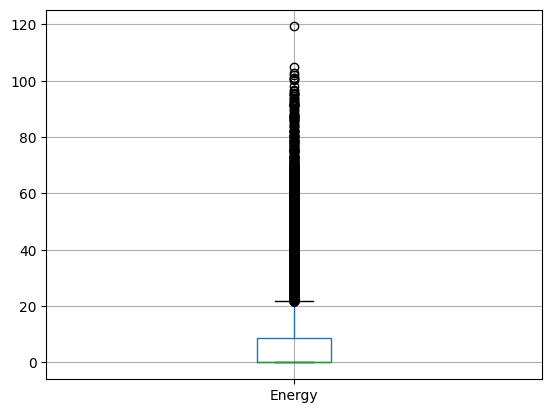

In [9]:
#boxplot for outliers
data.boxplot(column=['Energy'])
mlt.show()


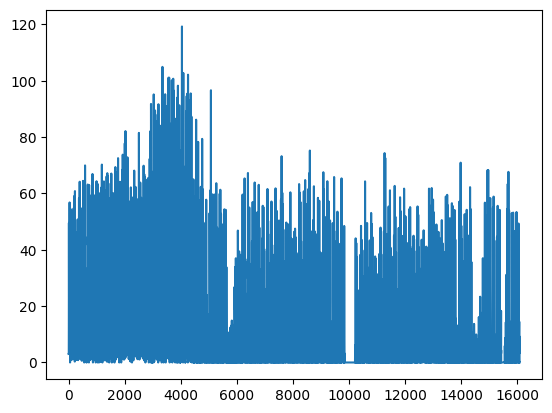

In [12]:

mlt.plot(data['Energy'], label='Energy Consumption')
mlt.show()

In [31]:
# remove the outliers
import pandas as pd

# Create example time series data
data = {
    'timestamp': pd.date_range(start='2023-01-01 00:00', periods=12, freq='H'),
    'value': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
}
df = pd.DataFrame(data)
df.set_index('timestamp', inplace=True)  # Set the timestamp as the index
df.drop(df.index[3:5], inplace=True)  # Remove the outliers
print("Original DataFrame:")
print(df)

# Resample to 3-hour intervals and sum the values, label='right'
resampled_df = df.resample('3H', label='right').sum()

print("\nResampled DataFrame:")
print(resampled_df)


Original DataFrame:
                     value
timestamp                 
2023-01-01 00:00:00     10
2023-01-01 01:00:00     20
2023-01-01 02:00:00     30
2023-01-01 05:00:00     60
2023-01-01 06:00:00     70
2023-01-01 07:00:00     80
2023-01-01 08:00:00     90
2023-01-01 09:00:00    100
2023-01-01 10:00:00    110
2023-01-01 11:00:00    120

Resampled DataFrame:
                     value
timestamp                 
2023-01-01 03:00:00     60
2023-01-01 06:00:00     60
2023-01-01 09:00:00    240
2023-01-01 12:00:00    330


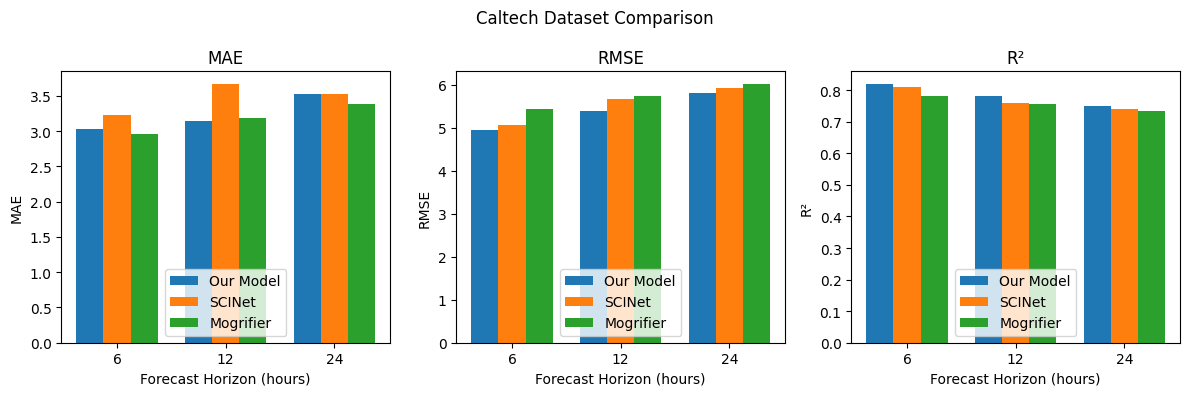

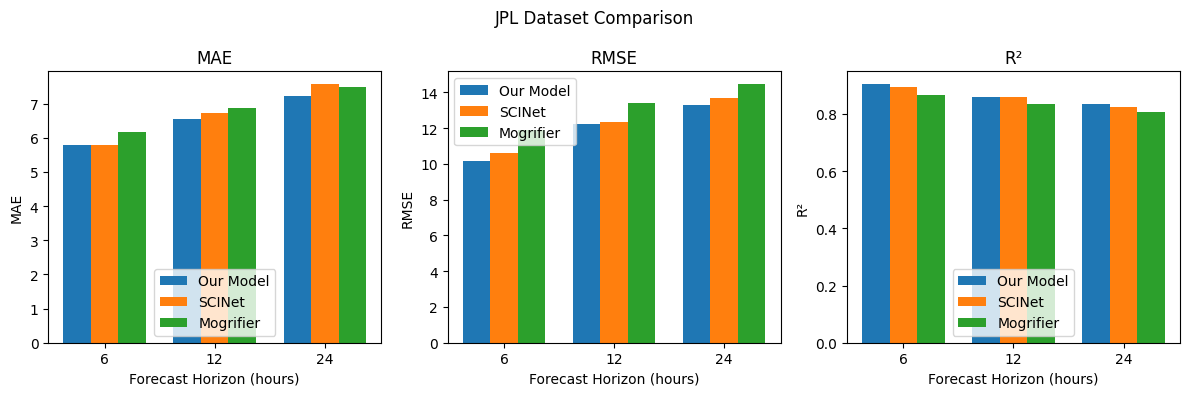

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------------------------------
# Caltech data (3 horizons: 6, 12, 24)
# ----------------------------------------------------
caltech_hours = [6, 12, 24]

# MAE
caltech_mae_our = np.array([3.033, 3.139, 3.521])
caltech_mae_sci = np.array([3.222, 3.665, 3.524])
caltech_mae_mog = np.array([2.961, 3.182, 3.384])

# RMSE
caltech_rmse_our = np.array([4.953, 5.400, 5.817])
caltech_rmse_sci = np.array([5.068, 5.667, 5.922])
caltech_rmse_mog = np.array([5.425, 5.743, 6.011])

# R²
caltech_r2_our = np.array([0.819, 0.783, 0.750])
caltech_r2_sci = np.array([0.809, 0.761, 0.740])
caltech_r2_mog = np.array([0.782, 0.756, 0.733])

# ----------------------------------------------------
# JPL data (3 horizons: 6, 12, 24)
# ----------------------------------------------------
jpl_hours = [6, 12, 24]

# MAE
jpl_mae_our = np.array([5.787, 6.537, 7.228])
jpl_mae_sci = np.array([5.788, 6.741, 7.568])
jpl_mae_mog = np.array([6.161, 6.871, 7.475])

# RMSE
jpl_rmse_our = np.array([10.164, 12.230, 13.298])
jpl_rmse_sci = np.array([10.590, 12.328, 13.678])
jpl_rmse_mog = np.array([11.873, 13.378, 14.449])

# R²
jpl_r2_our = np.array([0.904, 0.861, 0.836])
jpl_r2_sci = np.array([0.895, 0.858, 0.823])
jpl_r2_mog = np.array([0.867, 0.834, 0.807])


def plot_metric(ax, horizons, y_our, y_sci, y_mog, title, y_label):
    """
    Creates a grouped bar chart on the given 'ax' for Our Model, SCINet, and Mogrifier.
    horizons: list of horizon labels (e.g. [6, 12, 24])
    y_our, y_sci, y_mog: numpy arrays of metric values for each horizon
    title: subplot title
    y_label: label for the y-axis
    """
    x = np.arange(len(horizons))
    width = 0.25
    
    ax.bar(x - width, y_our, width, label='Our Model', color='C0')
    ax.bar(x,        y_sci, width, label='SCINet',    color='C1')
    ax.bar(x + width, y_mog, width, label='Mogrifier', color='C2')
    
    ax.set_xticks(x)
    ax.set_xticklabels(horizons)
    ax.set_xlabel('Forecast Horizon (hours)')  # <-- x-axis label
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.legend()

# ----------------------------------------------------
# FIGURE 1: Caltech (MAE, RMSE, R²)
# ----------------------------------------------------
fig1, axes1 = plt.subplots(1, 3, figsize=(12, 4))
fig1.suptitle('Caltech Dataset Comparison')

# MAE subplot
plot_metric(axes1[0], caltech_hours,
            caltech_mae_our, caltech_mae_sci, caltech_mae_mog,
            'MAE', 'MAE')

# RMSE subplot
plot_metric(axes1[1], caltech_hours,
            caltech_rmse_our, caltech_rmse_sci, caltech_rmse_mog,
            'RMSE', 'RMSE')

# R² subplot
plot_metric(axes1[2], caltech_hours,
            caltech_r2_our, caltech_r2_sci, caltech_r2_mog,
            'R²', 'R²')

plt.tight_layout()
plt.show()

# ----------------------------------------------------
# FIGURE 2: JPL (MAE, RMSE, R²)
# ----------------------------------------------------
fig2, axes2 = plt.subplots(1, 3, figsize=(12, 4))
fig2.suptitle('JPL Dataset Comparison')

# MAE subplot
plot_metric(axes2[0], jpl_hours,
            jpl_mae_our, jpl_mae_sci, jpl_mae_mog,
            'MAE', 'MAE')

# RMSE subplot
plot_metric(axes2[1], jpl_hours,
            jpl_rmse_our, jpl_rmse_sci, jpl_rmse_mog,
            'RMSE', 'RMSE')

# R² subplot
plot_metric(axes2[2], jpl_hours,
            jpl_r2_our, jpl_r2_sci, jpl_r2_mog,
            'R²', 'R²')

plt.tight_layout()
plt.show()
